In [128]:
# import necessary modules and libraries
import numpy as np 
import pandas as pd
from numpy import exp, array, random, dot, log
from itertools import combinations_with_replacement
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [129]:
# Homework-1: Design an artificial neural network model that learns the product of two digits (Digits: 0, 1, 2, 3, 4, 5, 6, 7, 8,9)? For example, if inputs 3 and 2 should find the result as 5.99 with an error of 0.01. You can create the necessary training set for two digits yourself.

In [130]:
# A Python program to print all combinations 
# with an element-to-itself combination is  
# also included 

X = []
# Get all combinations of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] and length 2 
comb = combinations_with_replacement([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2) 
  
# Print the obtained combinations 
for i in list(comb):
    datum = list(i)
    X.append(datum)

X = log(array(X))
df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': X[:, 0]+X[:, 1]})
df = df[np.isfinite(df['label'])]

In [131]:
data = df.values[:, 0:2]
labels = df.values[:, 2].reshape(-1, 1)

In [132]:
class NeuralNetwork():

    def __init__(self):
        np.random.seed(1)
        self.synpatic_weights = 2 * random.random((2,1)) - 1

    def __softmax(self, Z):
	    expZ = np.exp(Z - np.max(Z))
	    return expZ / expZ.sum(axis=0, keepdims=True)

    
    def train(self, training_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = 0.001*(dot(training_inputs.T, error * self.__softmax(output)))
            self.synpatic_weights += adjustments

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return (dot(inputs, self.synpatic_weights))

    def predict(self, input):
        input = log(input)
        output = exp(dot(input, self.synpatic_weights))
        output = "{:.2f}".format(output[0])
        return output

In [133]:
# Initialize Neural Network
neural_network = NeuralNetwork()

# Training the neural network using the training set.
neural_network.train(data, labels, 35000)

In [134]:
# Ask the neural network the output
print(neural_network.predict(array([3, 2])))

5.99


In [135]:
# Homework-2: Classify Irıs dataset by using decision tree, naive bayes classifier, and SVM methods. Please use classification metrics such as accuracy, F1 score, precision, recall etc.?

In [136]:
# Get df
df = pd.read_csv('iris_csv.csv')

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [138]:
# Reassign labels
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

df = pd.read_csv('iris_csv.csv')

df['class'] = df['class'].map(d)

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


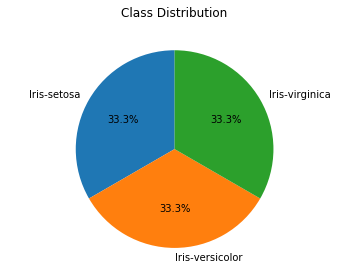

In [139]:
# Check  distribution of data
class_dist = df.groupby('class').size()
labels = 'Iris-setosa','Iris-versicolor', 'Iris-virginica'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [140]:
# Get data and labels
data = df.values[:, 0:4]
labels = df.values[:, 4]

In [141]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


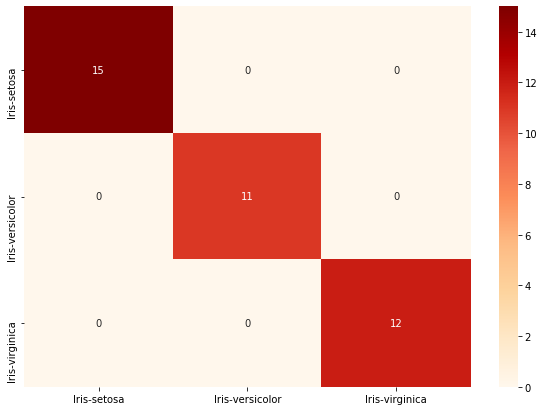

In [142]:
# Do DT classification
dtClf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
y_pred = dtClf.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (dtClf.score(X_test, y_test)*100))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


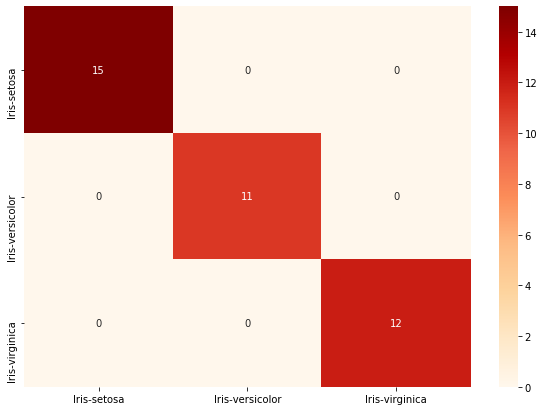

In [143]:
# Do Naive Bayes classification
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (gnb.score(X_test, y_test)*100))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


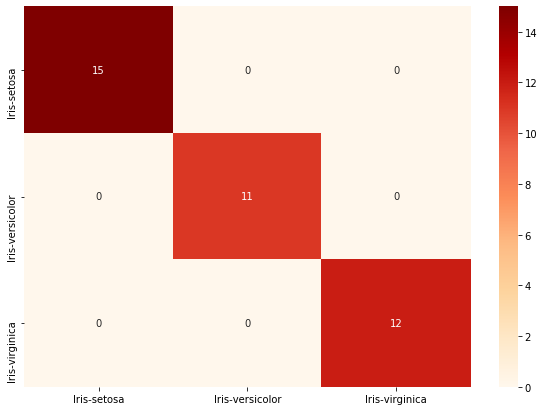

In [144]:
# Do SVM Classification 
clfSVM = svm.SVC()
y_pred = clfSVM.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (clfSVM.score(X_test, y_test)*100))

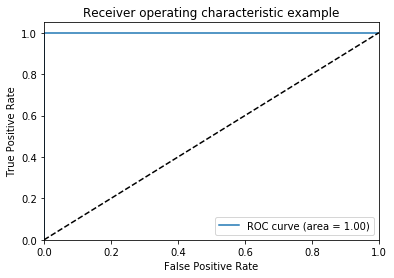

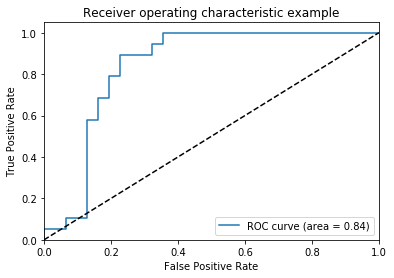

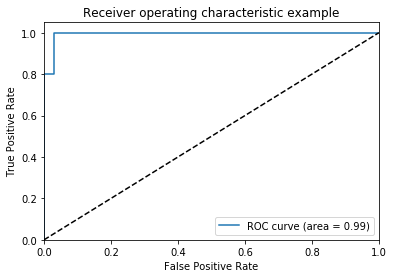

In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [146]:
# Homework-3: Implement a Linear Discriminant analysis to classify diabets dataset. The dataset can be downloaded from  https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/hw03/dataset_37_diabetes.csv  .

In [147]:
df = pd.read_csv('dataset_37_diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [148]:
d = {'tested_negative': 0, 'tested_positive': 1, }

df['class'] = df['class'].map(d)

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


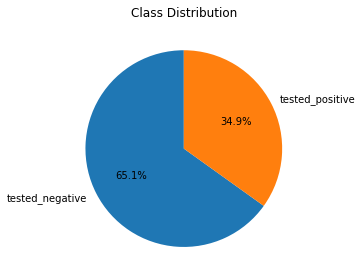

In [149]:
# Check  distribution of data
class_dist = df.groupby('class').size()
labels = 'tested_negative', 'tested_positive'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

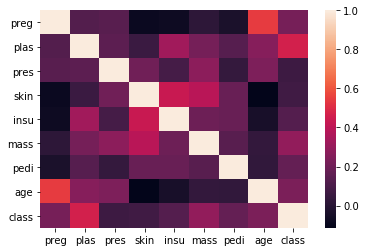

In [150]:
# Check correlation
corr=df.corr()
sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [151]:
# Get data and labels from the df
data = df.values[:, 0:8]
labels = df.values[:, 8]

In [152]:
# Apply std scaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [153]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0, shuffle=True)
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.79      0.57      0.67        47

    accuracy                           0.82       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.82      0.82      0.82       154

Test accuracy: 82.47%


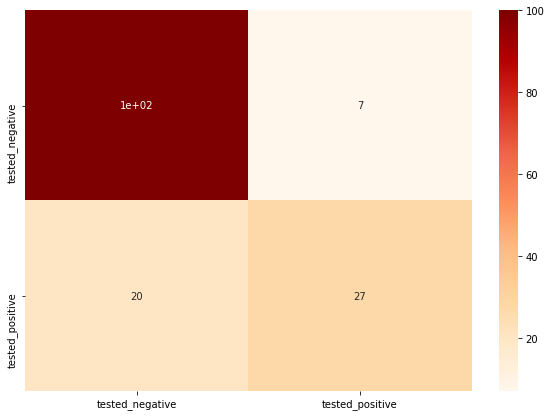

In [154]:
# classification
classifier = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['tested_negative', 'tested_positive']],
              columns = [i for i in ['tested_negative', 'tested_positive']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (classifier.score(X_test, y_test)*100))

In [155]:
# Plot ROC Curve
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

NameError: name 'model' is not defined